In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import  fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor

X.shape: (26, 2)


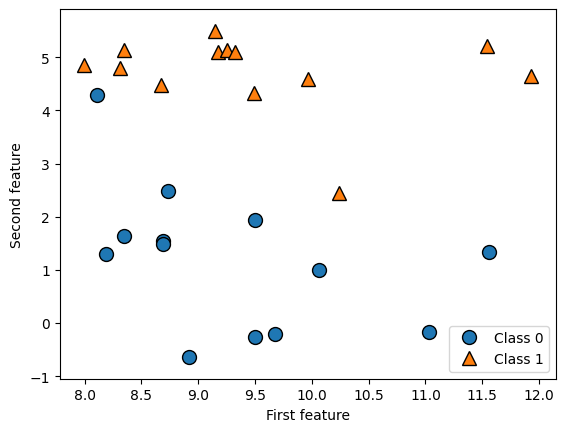

In [2]:
#generate the dataset
X,y = mglearn.datasets.make_forge()
#plot the dataset
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

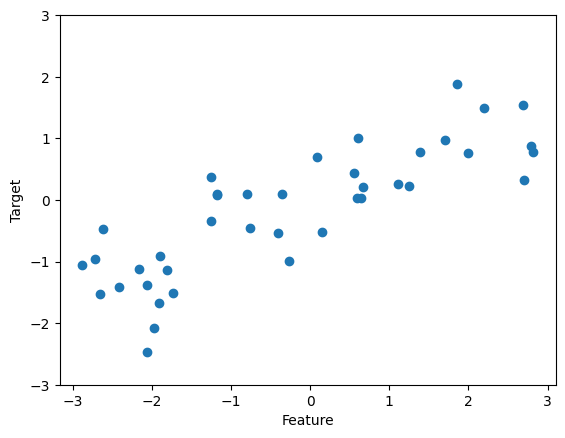

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
cancer = load_breast_cancer()
print("cancer .keys(): \n {}".format(cancer.keys()))

cancer .keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("Shape of the cancer data: {}".format(cancer.data.shape))

Shape of the cancer data: (569, 30)


In [6]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [7]:
print("Feature names: \n {}".format(cancer.feature_names))

Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
california = fetch_california_housing()
print("Data Shape: {}".format(california.data.shape))

Data Shape: (20640, 8)


In [9]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [10]:
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [11]:
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [14]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy: 0.86


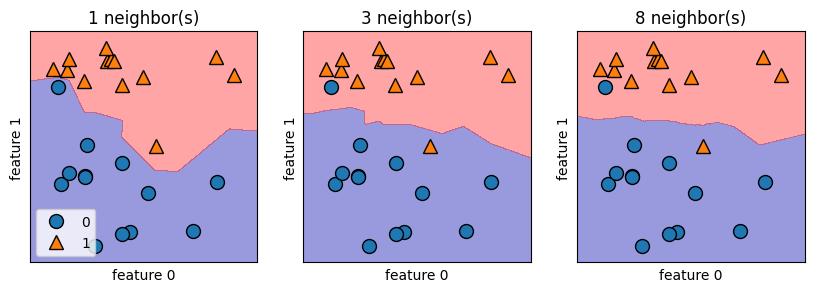

In [15]:
fig,axes = plt.subplots(1,3,figsize =(10,3))
for n_neighbors, ax in zip([1,3,8],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

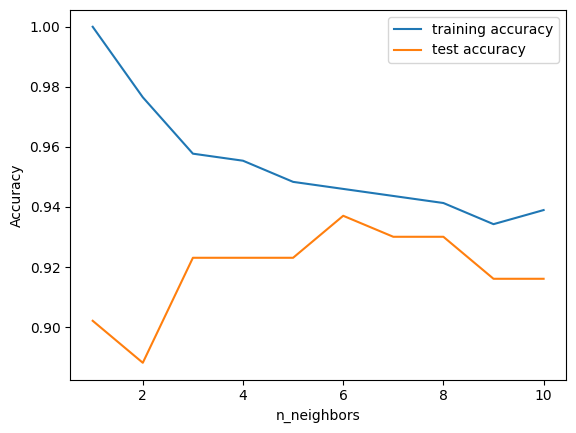

In [16]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors  in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

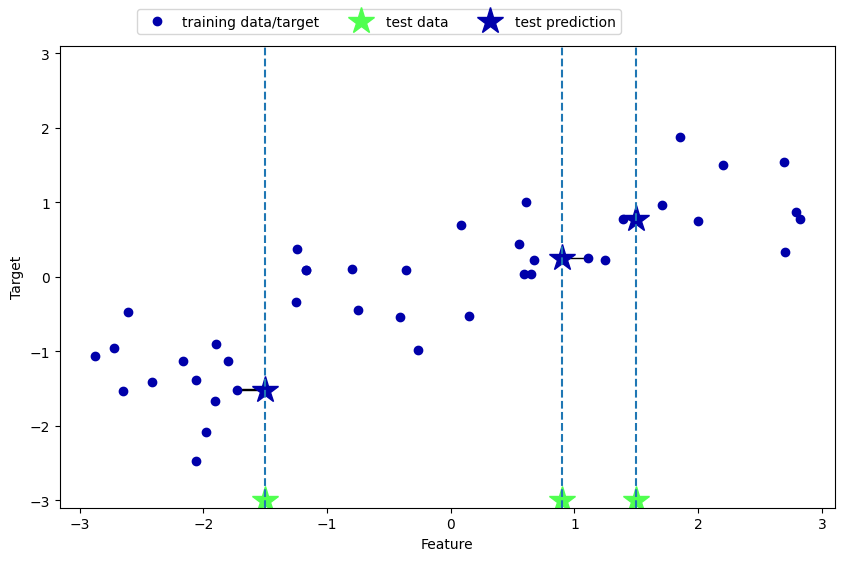

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

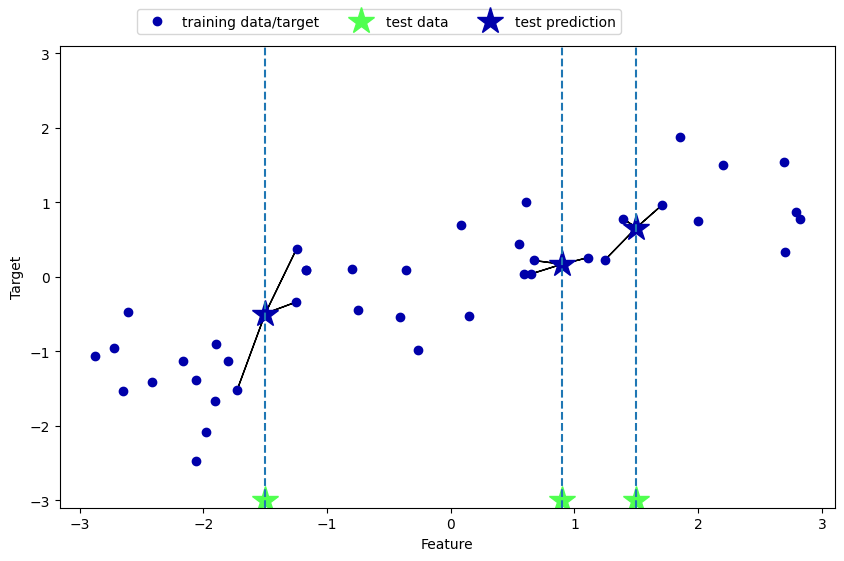

In [18]:
 mglearn.plots.plot_knn_regression(n_neighbors=3)

page 42

In [22]:
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


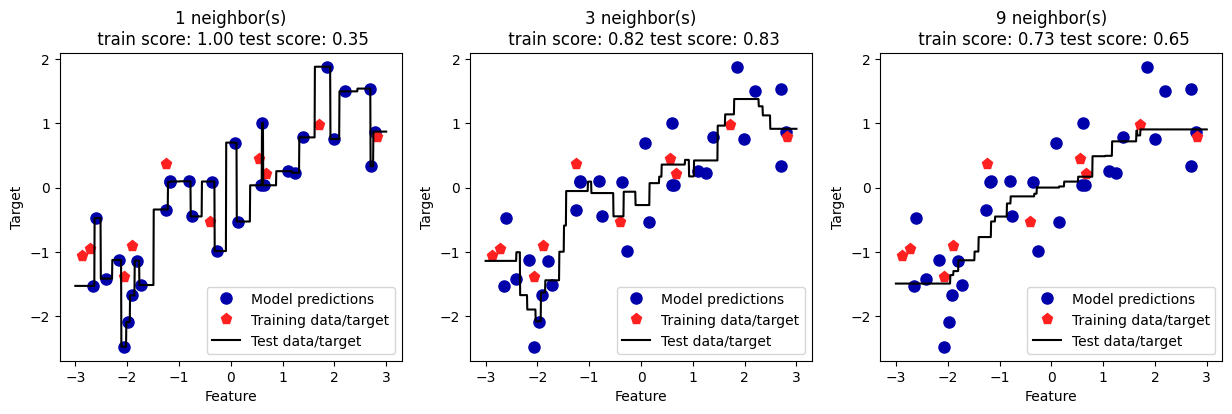

In [30]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
#create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    #make predictions using 1,3 or 9 neighbours
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(X_train,y_train,'o',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'p',c=mglearn.cm2(1),markersize=8)
    y_pred = reg.predict(line)
    ax.plot(line, y_pred, label='Model predictions', c='black')
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    ax.legend(["Model predictions", "Training data/target","Test data/target"],loc="best")

**more neighbors more smoother predictions**